# Import All Libreries

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Import & Reload FunctionsFile.py

In [3]:
from importlib import reload
import FunctionsFile as f
reload(f)

<module 'FunctionsFile' from '/Users/book/Downloads/Learning/DataScienceWithPython/PFE/src/FunctionsFile.py'>

# Extract Data from .txt files

In [4]:
from FunctionsFile import *

train_img_paths,train_CleanedLabels,test_img_paths,test_CleanedLabels,validation_img_paths,validation_CleanedLabels,train_characters,train_max_len = ExtractData(
    'train_img_paths','train_CleanedLabels',
    'test_img_paths','test_CleanedLabels',
    'validation_img_paths','validation_CleanedLabels',
    'train_characters','train_max_len')

# Some images with their labels with different sizes

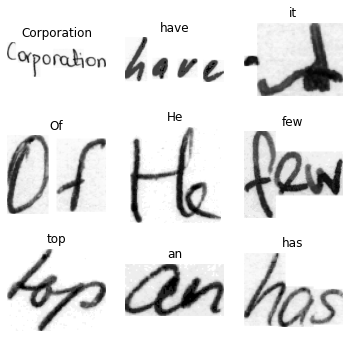

In [5]:
plt.figure(figsize=(6,6))

for i in range(9) : 
    img = Image.open(test_img_paths[i])
    plt.subplot(3,3,i+1)
    plt.axis('off') 
    plt.title(test_CleanedLabels[i])
    #img = img.resize((128,32))
    plt.imshow(img,cmap='gray')

# Resize all train, test, validation images

In [7]:
size = (96,64)
#Resized_train_img = resizeImages(train_img_paths,size)
Resized_test_img = resizeImages(test_img_paths,size)
Resized_validation_img = resizeImages(validation_img_paths,size)

#print(Resized_train_img.shape)
print(Resized_test_img.shape)
print(Resized_validation_img.shape)

(4822, 64, 96)
(4823, 64, 96)


# Plot the resized images (width = 96, height = 64)

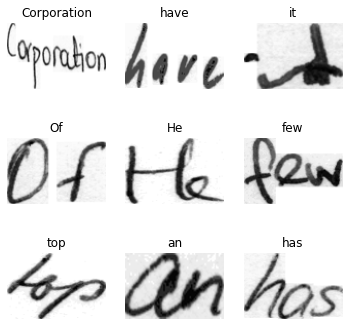

In [8]:
plt.figure(figsize=(6,6))

for i in range(9) : 
    img = Resized_test_img[i]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title(test_CleanedLabels[i])
    plt.imshow(img,cmap='gra')

# Reshape data 

In [9]:


#Reshaped_train_img,Reshaped_test_img,Reshaped_validation_img = ReshapeData(Resized_train_img,Resized_test_img,Resized_validation_img)
Reshaped_test_img,Reshaped_validation_img = ReshapeData(Resized_test_img,Resized_validation_img)

print(Resized_test_img.shape,Resized_validation_img.shape)
print(Reshaped_test_img.shape,Reshaped_validation_img.shape)

(4822, 64, 96) (4823, 64, 96)
(4822, 6144) (4823, 6144)
[[0.9843137  0.9843137  0.9843137  ... 1.         1.         1.        ]
 [0.9843137  0.9843137  0.9843137  ... 0.9843137  0.9843137  0.9843137 ]
 [1.         1.         1.         ... 0.9254902  0.9411765  0.9372549 ]
 ...
 [1.         1.         1.         ... 0.95686275 0.9843137  1.        ]
 [0.95686275 0.93333334 0.9019608  ... 0.98039216 0.9843137  0.9764706 ]
 [0.93333334 0.93333334 0.9372549  ... 0.9490196  0.9490196  0.9490196 ]]
[[0.7607843  0.7607843  0.7607843  ... 0.9490196  0.9490196  0.9490196 ]
 [0.9137255  0.92941177 0.94509804 ... 0.92156863 0.92156863 0.8980392 ]
 [0.77254903 0.7647059  0.7529412  ... 0.972549   0.972549   0.9764706 ]
 ...
 [0.92156863 0.9647059  0.9764706  ... 0.98039216 0.9843137  0.9843137 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


# Convert to Category

In [43]:
ConvertToCat(train_characters)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)